# 1 Binarização de imagens

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
from skimage.filters.rank import otsu
from skimage.filters import threshold_otsu as t_otsu, try_all_threshold as tall
from skimage.morphology import disk, ball, square
from skimage import io,img_as_float, img_as_ubyte
from skimage.exposure import histogram

In [2]:
def data_info(img):
    print(f"Classe: {type(img)}")
    print(f"Tipo de variável: {img.dtype}")
    print(f"Min, max: {img.min(),img.max()}")
    print(f"Dimensões: {img.shape}")

In [ ]:
placa = io.imread('placa1.jpg')

data_info(placa)

hist, hist_centers = histogram(placa)# histograma da imagem. hist_centers são os centros dos bins.
#Para imagens do tioi int, cada tom de cinza é seu próprio bin.

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax = axes.ravel()

ax[0].imshow(placa, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].plot(hist_centers, hist)
ax[1].set_title('Histograma'); 

plt.tight_layout() 

## 1.1 Binarização manual

In [ ]:
Bin = placa >= 100
data_info(Bin)
plt.imshow(Bin, cmap=plt.cm.gray); 
plt.axis('off'); 

## 1.2 Binarização automática por Otsu

In [ ]:
radius = 10
selem  = square(radius)

# t_loc_otsu is an image
t_loc_otsu = otsu(placa, selem)
loc_otsu = placa >= t_loc_otsu

# t_glob_otsu is a scalar
t_glob_otsu = t_otsu(placa)
glob_otsu = placa >= t_glob_otsu

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(7, 7),
                         sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(t_loc_otsu, cmap=plt.cm.gray)
ax[0].set_title('Otsu Local ($r=%d$)' % radius)

ax[1].imshow(placa >= t_loc_otsu, cmap=plt.cm.gray)
ax[1].set_title('Original >= local Otsu' % t_glob_otsu)

ax[2].imshow(glob_otsu, cmap=plt.cm.gray)
ax[2].set_title('Global Otsu ($t=%d$)' % t_glob_otsu)

for a in ax:
    a.axis('off')
    
plt.tight_layout()

## 1.3 Testando todos os algoritmos do skimage

In [ ]:
fig.ax = tall(placa); 

## 2 Tente na imagem `gaussian_shaded.tif`. O que acontece? Como resolver?

In [ ]:
Get = io.imread('gaussian_shaded.tif')
plt.imshow(Get,cmap='gray')
data_info(Get)

## 2.1 Binarização por Otsu (local e global)

In [ ]:
#Binarização por Otsu
t_glob_otsu = t_otsu(Get)
glob_otsu   = Get >= t_glob_otsu
plt.imshow(glob_otsu,cmap='gray'); 
data_info(glob_otsu)

Particionamento

In [ ]:
#%fazendo particionamento
#%linha 1
P11 = Get[0:325,0:271]
P12 = Get[0:325,271:542]
P13 = Get[0:325,542:814]
P21 = Get[325:651,0:271]
P22 = Get[325:651,271:542]
P23 = Get[325:651,542:814]

#%aplicando Otsu
P11_Otsu = P11 >= t_otsu(P11)
P12_Otsu = P12 >= t_otsu(P12)
P13_Otsu = P13 >= t_otsu(P13)
P21_Otsu = P21 >= t_otsu(P21)
P22_Otsu = P22 >= t_otsu(P22)
P23_Otsu = P23 >= t_otsu(P23)

#%juntando as imagens
P_Otsu = np.empty([Get.shape[0],Get.shape[1]])
P_Otsu[0:325,0:271]     = P11_Otsu
P_Otsu[0:325,271:542]   = P12_Otsu
P_Otsu[0:325,542:814]   = P13_Otsu
P_Otsu[325:651,0:271]   = P21_Otsu
P_Otsu[325:651,271:542] = P22_Otsu
P_Otsu[325:651,542:814] = P23_Otsu
#P_Otsu = logical(P_Otsu)

In [ ]:
data_info(P_Otsu)
fig, ax = plt.subplots(1,2)

ax[0].imshow(glob_otsu,cmap='gray')
ax[1].imshow(P_Otsu,cmap='gray'); 

## 3 Binarização interativa

Classe: <class 'numpy.ndarray'>
Tipo de variável: uint8
Min, max: (29, 224)
Dimensões: (958, 798)


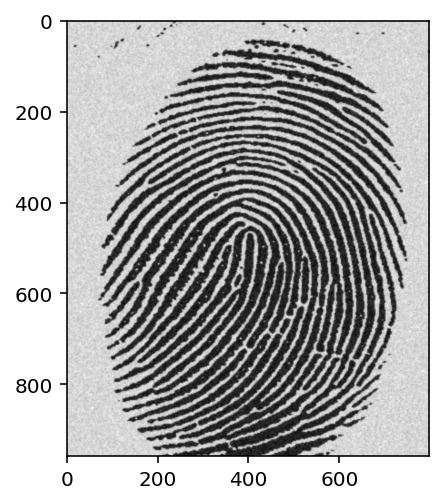

In [3]:
finger = io.imread('finger.tif')
#Get = img_as_float(Get)
plt.imshow(finger,cmap='gray')
data_info(finger)

O limiar inicial é: 50
m1: 146.49093193916562
m2: 46.50216484926235
t: 96.0
Dif: 46.0
Iteração: 1
m1: 184.2929035383769
m2: 62.11860055954544
t: 123.0
Dif: 27.0
Iteração: 2
m1: 186.716675613189
m2: 64.02552677290235
t: 125.0
Dif: 2.0
Iteração: 3
m1: 186.728248508753
m2: 64.04379010947527
t: 125.0
Dif: 0.0
Iteração: 4


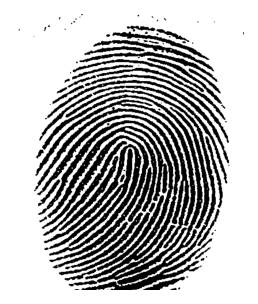

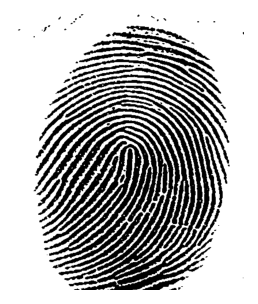

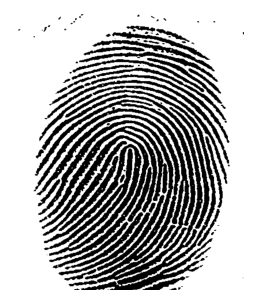

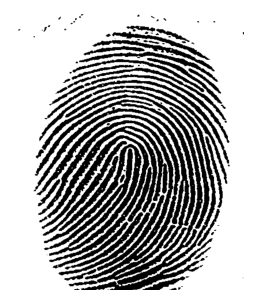

In [40]:
#B1    = np.empty([Get.shape[0],Get.shape[1]])
#B2 = B1.copy()
Dt   = 0
cont = 0
#%limiar inicial
tini = 50#round(finger.mean())
Dif  = 300 #%inicializando Dif
t    = tini #%inicializando o limiar como tini
print(f"O limiar inicial é: {t}")
while Dif > Dt:
    B1 = np.where(finger>t,1,np.nan)
    b1 = B1 * finger
    m1 = np.nanmean(b1)#b1.mean()
    B2 = np.where(finger<=t,1,np.nan)
    b2 = B2 * finger
    m2 = np.nanmean(b2)#b2.mean()
    t  = round((m1 + m2) / 2)
    Dif = round(abs(tini - t))
    tini = t
    cont = cont + 1
    fg,ax = plt.subplots(1,1,figsize=(2,2),constrained_layout=True)
    ax.imshow(finger > t,cmap='gray')
    ax.axis('off')
    print(f"m1: {m1}")
    print(f"m2: {m2}")
    print(f"t: {t}")
    print(f"Dif: {Dif}")
    print(f"Iteração: {cont}")